# Time Series

In [1]:
from pandas import read_excel
from matplotlib import pyplot as plt
import numpy as np

Australian monthly electricity production, displays a clear trend and
seasonality

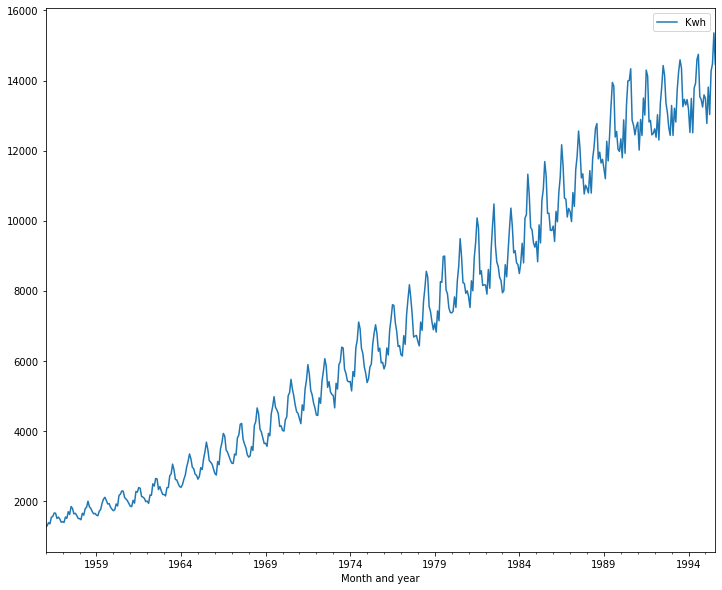

In [2]:
fig, ax = plt.subplots(figsize=(12,10))
series = read_excel('Electricity.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)
series.plot(ax=ax)
plt.show()

<ipython-input-3-4e3265e97293>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_excel('Electricity.xls', sheet_name='SeasData', header=0, index_col=0, parse_dates=True)


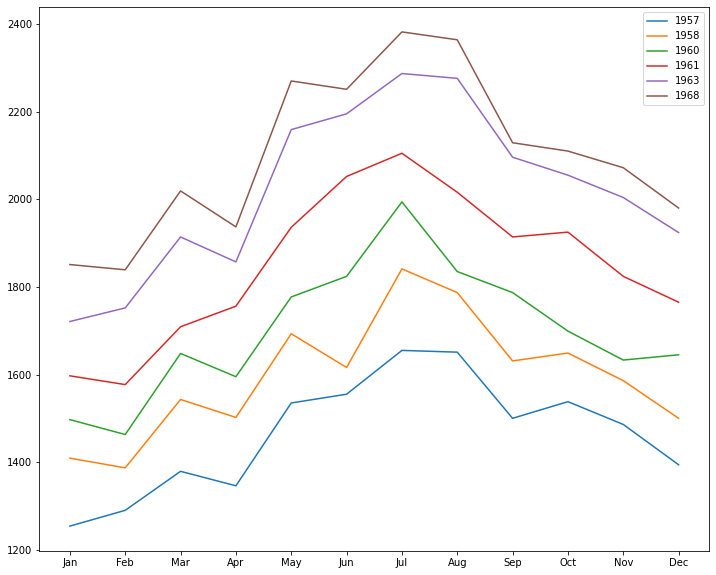

In [3]:
series = read_excel('Electricity.xls', sheet_name='SeasData', header=0, index_col=0, parse_dates=True)
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(figsize=(12,10))
for column in series.columns:
    plt.plot(x, series[column])

plt.xticks(x, months)
years = [1957,1958, 1960, 1961, 1963, 1968]
plt.legend(years)

plt.show()

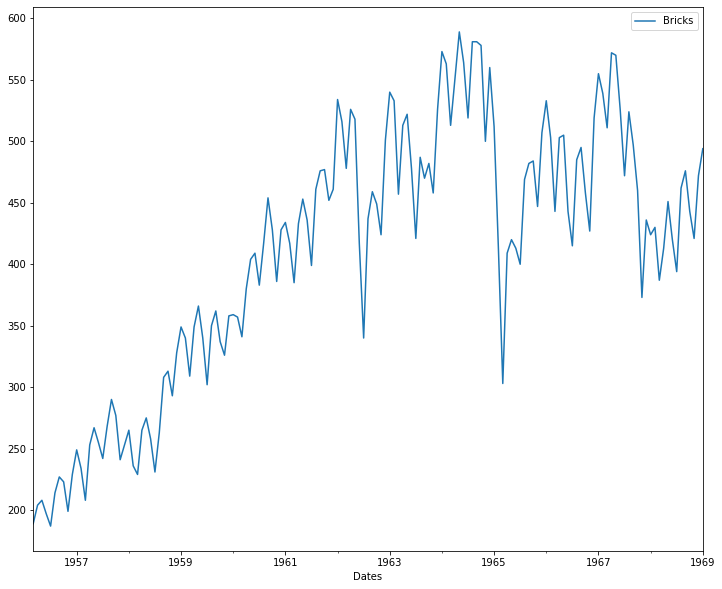

In [4]:
fig, ax = plt.subplots(figsize=(12,10))
series = read_excel('ClayBricks.xls', sheet_name='BRICKSQ', header=0, index_col=0, parse_dates=True)
series.plot(ax=ax)
plt.show()

Australian clay brick production contains occasional large fluctuations which
are difficult to explain, and hence predict, without knowing the underlying causes

<ipython-input-5-104ea269e2f7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_excel('ClayBricks.xls',  sheet_name='SeasonalData', header=0, index_col=0, parse_dates=True)


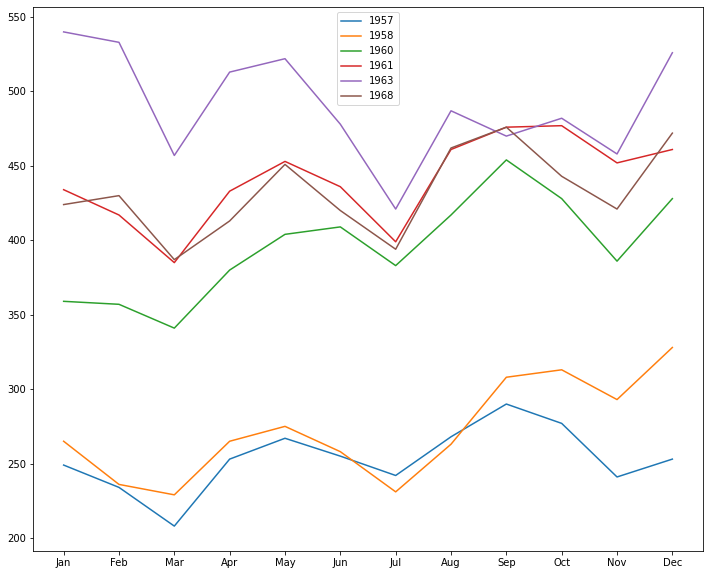

In [5]:
series = read_excel('ClayBricks.xls',  sheet_name='SeasonalData', header=0, index_col=0, parse_dates=True)
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(figsize=(12,10))
for column in series.columns:
    plt.plot(x, series[column])

plt.xticks(x, months)
years = [1957,1958, 1960, 1961, 1963, 1968]
plt.legend(years)

plt.show()

# Correlation
$Cov_{XY} = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$

$Cov_{XY}$ represents the covariance between X and Y.
n is the number of observations.
$X_i$ and $Y_i$ are the individual observations of X and Y, respectively.
$\bar{X}$ and $\bar{Y}$ are the means of X and Y, respectively.
The sum is taken over all n observations.

$r_{XY} = \frac{Cov_{XY}}{S_X S_Y} = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}}$
n is the number of observations.
$X_i$ and $Y_i$ are the individual observations of X and Y, respectively.
$\bar{X}$ and $\bar{Y}$ are the means of X and Y, respectively.
$S_X$ and $S_Y$ are the standard deviations of X and Y, respectively.
The sum is taken over all n observations.


In [6]:
series1 = read_excel('JapaneseCars.xls', sheet_name='Data', header=0,
                      dtype=float)
correlval=np.corrcoef(series1['Mileage'], series1['Price'])
correlval=correlval[1,0]
print(correlval)

-0.7277246246668201


# Autocorrelation
The use of covariance and correlation can be extended to a time series $\{Y_t\}$. We can compare $Y_t$ with the previous lagged value $Y_{t-1}$. The autocovariance, $c_k$, and autocorrelation at lag $k$, $r_k$, are defined by

$$
c_k = \frac{1}{n-1} \sum_{t=k+1}^{n} (Y_t - \bar{Y})(Y_{t-k} - \bar{Y})
$$

and

$$
r_k = \frac{\sum_{t=k+1}^{n}(Y_t - \bar{Y})(Y_{t-k} - \bar{Y})}{\sum_{t=1}^{n}(Y_t - \bar{Y})^2} \quad (1.2)
$$

respectively. The complete set of autocovariances is called the autocovariance function, and the set of autocorrelations, the autocorrelation function (ACF).


<ipython-input-17-7af873c4fd08>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series1 = read_excel('CementProduction.xls', sheet_name='Data', header=0,
<ipython-input-17-7af873c4fd08>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series2 = read_excel('CementProduction.xls', sheet_name='SeasonalData', header=0,


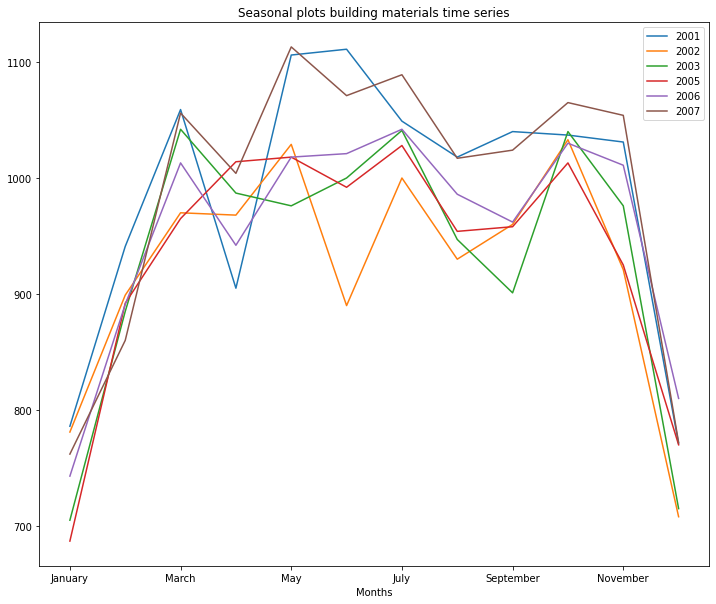

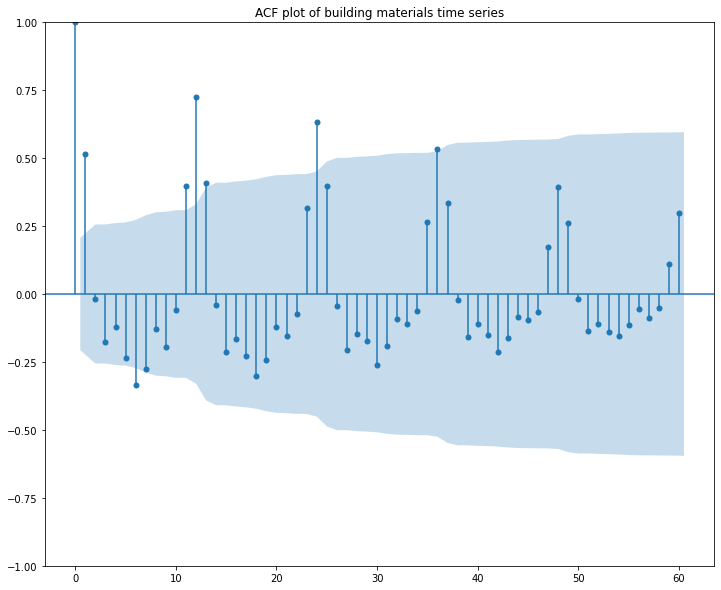

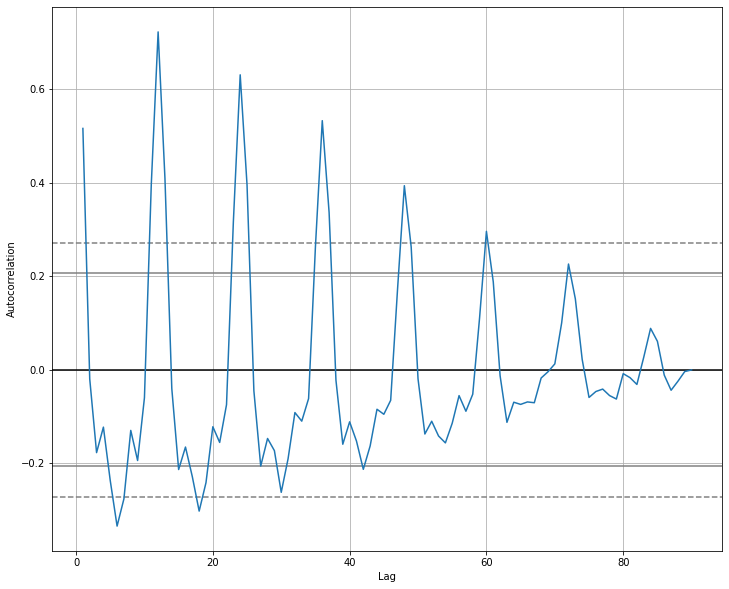

In [17]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
series1 = read_excel('CementProduction.xls', sheet_name='Data', header=0,
              index_col=0, parse_dates=True)
series2 = read_excel('CementProduction.xls', sheet_name='SeasonalData', header=0,
                    index_col=0, parse_dates=True)
fig, ax = plt.subplots(figsize=(12,10))
series2.plot(title='Seasonal plots building materials time series', ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(12,10))
plot_acf(series1, title='ACF plot of building materials time series', lags=60, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(12,10))
autocorrelation_plot(series1, ax=ax)
plt.show()

# Additive Decomposition

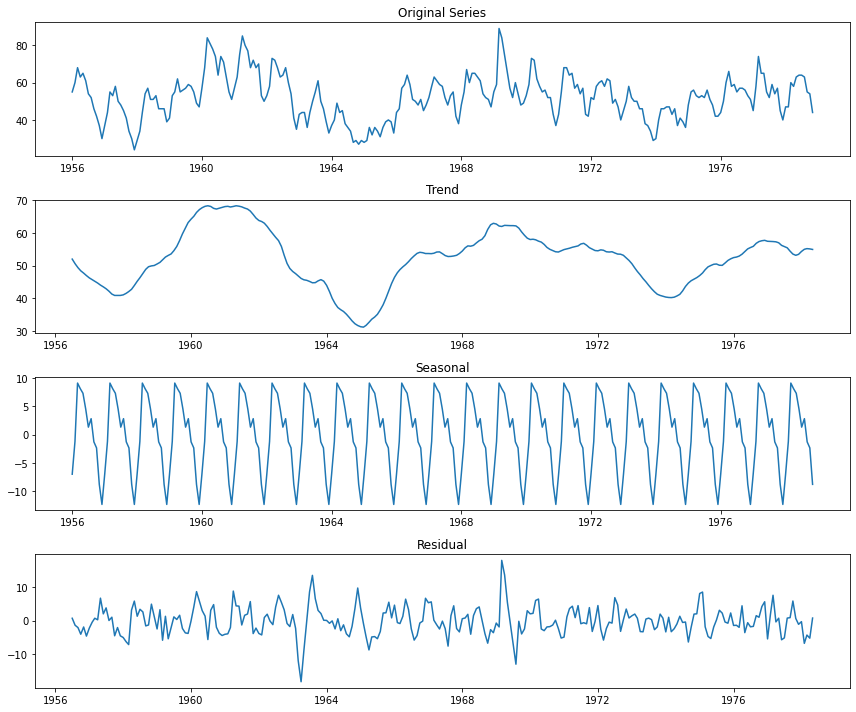

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

series = read_excel('HouseSales.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)
result = seasonal_decompose(series, model='additive')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10))

# Plot original series
ax1.plot(result.observed)
ax1.set_title('Original Series')

# Plot trend component
ax2.plot(result.trend)
ax2.set_title('Trend')

# Plot seasonal component
ax3.plot(result.seasonal)
ax3.set_title('Seasonal')

# Plot residual component
ax4.plot(result.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()
